In [1]:
import pandas as pd
import numpy as np

In [16]:
df1 = pd.read_csv('CCES2016.csv', encoding = 'latin1', index_col = 'V101', na_values = ['__NA__'])
df2 = pd.read_csv('CCES2.csv', encoding = 'latin1', index_col = 'V101', na_values = ['__NA__'])
df3 = pd.read_csv('CCES3.csv', encoding = 'latin1', index_col = 'V101', na_values = ['__NA__'])

#'utf-8' codec can't decode byte 0xe1 in position 5: unexpected end of data

df = df1.append(df2)
df = df.append(df3)

df = df.reset_index()

C:\Users\joshy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (50,51,52,53,54,55,79,119,254,262,270,271,274,286,296,298,300,302,304,306,308,310,314,316,318,322,326,328,332,333,370,410,411,412,413,414,415,452,458,460,462,494,535) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\joshy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (46,47,48,49,50,51,52,53,54,55,79,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,164,165,166,167,168,169,170,199,200,201,203,228,239,240,242,243,254,262,264,270,271,274,278,279,286,296,298,300,302,304,306,308,310,312,314,316,317,318,320,322,324,326,328,330,332,334,370,406,407,408,409,410,411,412,413,414,415,443,450,452,458,460,520,535) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=resu

In [6]:
df.head()

,index,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
0,0,222168628,1.344214,1.042267,1.195346,0.944967,0.730450,Yes,3442,New Hampshire,...,NaN,NaN,NaN,NaN,05:44.9,36:38.8,24:32.9,40:18.8,NaN,NaN
1,1,273691199,1.182352,1.280103,1.280565,0.767256,0.892838,Yes,70118,Louisiana,...,NaN,NaN,NaN,NaN,54:58.5,20:41.7,02:55.1,09:26.9,622.0,NEW ORLEANS
2,2,284214415,0.217396,NaN,0.248930,0.090604,0.000000,No,63851,Missouri,...,NaN,NaN,NaN,NaN,54:12.8,24:44.8,NaN,NaN,632.0,PADUCAH-CAPE GIRARD-HARSBG
3,3,287557695,0.532320,NaN,0.928750,0.142583,0.000000,No,36703,Alabama,...,NaN,NaN,NaN,NaN,06:21.3,26:00.1,NaN,NaN,698.0,MONTGOMERY-SELMA
4,4,290387662,1.261106,1.092519,1.161894,1.206498,1.019007,Yes,80526,Colorado,...,NaN,NaN,NaN,NaN,56:31.1,14:12.2,09:28.0,21:05.9,751.0,DENVER


In [17]:
cumulative = pd.read_csv('cumulative16.csv', encoding = 'latin1')

df['birthyr'] = cumulative['birthyr']

In [8]:
cumulative.head()

,year,case_id,weight,weight_cumulative,state,st,cd,dist,dist_up,cong,...,voted_gov_chosen,voted_gov_fec,rep_current,rep_icpsr,sen1_current,sen1_icpsr,sen2_current,sen2_icpsr,gov_current,gov_fec
0,2016,222168628,1.344214,0.550899,New Hampshire,NH,NH-2,2,2,114,...,Chris Sununu (R),NaN,Ann McLane Kuster (D),21340.0,Jeanne Shaheen (D),40906.0,Kelly Ayotte (R),41106.0,Maggie Hassan (D),NaN
1,2016,273691199,1.182352,0.484563,Louisiana,LA,LA-2,2,2,114,...,NaN,NaN,Cedric Richmond (D),21137.0,David Vitter (R),29918.0,Bill Cassidy (R),20919.0,John Edwards (D),NaN
2,2016,284214415,0.217396,0.089095,Missouri,MO,MO-8,8,8,114,...,Chris Koster (D),NaN,Jason T. Smith (R),21373.0,Claire McCaskill (D),40701.0,Roy Blunt (R),29735.0,Jay Nixon (D),MO17619
3,2016,287557695,0.532320,0.218161,Alabama,AL,AL-7,7,7,114,...,NaN,NaN,Terri Sewell (D),21102.0,Richard Shelby (R),94659.0,Jeff Sessions (R),49700.0,Robert J. Bentley (R),AL3188
4,2016,290387662,1.261106,0.516839,Colorado,CO,CO-2,2,2,114,...,NaN,NaN,Jared Polis (D),20904.0,Michael Bennet (D),40910.0,Cory Gardner (R),21112.0,John Hickenlooper (D),CO143744


In [5]:
#ensure that case IDs match for both CSV files, and that the birth years are identical
different_index = []
for i in range(64600):
    if df['V101'].iloc[i] != cumulative['case_id'].iloc[i]:
        different_index.append(i)
        
different_year = []
for i in range(64600):
    if df['birthyr'].iloc[i] != cumulative['birthyr'].iloc[i]:
        different_year.append((i, df['birthyr'].iloc[i], cumulative['birthyr'].iloc[i] ))
        
print(len(different_index))
print(len(different_year))

0
0


In [6]:
columns_indices = []

for i in range(len(df.columns)):
    #if "ed" in df.columns[i]:
    columns_indices.append((i, df.columns[i]))
    
columns_indices = sorted(columns_indices, key = lambda x: x[1].lower())

for item in columns_indices:
    if item[0] < 10:
        print(str(item[0]) + "   " + str(item[1]))
    elif item[0] < 100:
        print(str(item[0]) + "  " + str(item[1]))
    else:
        print(str(item[0]) + " " + str(item[1]))

70  add_confirm
104 Asian_origin_1
113 Asian_origin_10
114 Asian_origin_11
115 Asian_origin_12
116 Asian_origin_13
117 Asian_origin_14
118 Asian_origin_15
105 Asian_origin_2
106 Asian_origin_3
107 Asian_origin_4
108 Asian_origin_5
109 Asian_origin_6
110 Asian_origin_7
111 Asian_origin_8
112 Asian_origin_9
119 Asian_origin_t
372 AskParty_post
75  birthyr
121 CC16_300_1
122 CC16_300_2
123 CC16_300_3
124 CC16_300_4
125 CC16_300_5
126 CC16_300_6
127 CC16_300b
128 CC16_300c
129 CC16_300d_1
130 CC16_300d_2
131 CC16_300d_3
132 CC16_300d_4
133 CC16_300d_5
134 CC16_301a
135 CC16_301b
136 CC16_301c
137 CC16_301d
138 CC16_301e
139 CC16_301f
140 CC16_301g
141 CC16_301h
142 CC16_301i
143 CC16_301j
144 CC16_301k
145 CC16_301l
146 CC16_301m
147 CC16_301n
148 CC16_301o
149 CC16_302
150 CC16_303
151 CC16_304
152 CC16_305_1
161 CC16_305_10
162 CC16_305_11
153 CC16_305_2
154 CC16_305_3
155 CC16_305_4
156 CC16_305_5
157 CC16_305_6
158 CC16_305_7
159 CC16_305_8
160 CC16_305_9
163 CC16_307
164 CC16_312_1
16

In [8]:
#print number of NaN values by column

nan_counts = []
for col in df.columns:
    nan_counts.append((col, df[col].isnull().sum()))
    
nan_counts = sorted(nan_counts, key = lambda x: x[1])

for i in range(1, len(nan_counts)):
    print(nan_counts[i])

('commonweight_vv', 0)
('commonweight', 0)
('commonweight_post', 0)
('tookpost', 0)
('lookupzip', 0)
('inputstate', 0)
('cdid113', 0)
('cdid115', 0)
('GovCand1Incumbent', 0)
('GovCand2Incumbent', 0)
('HouseCand1Incumbent', 0)
('HouseCand2Incumbent', 0)
('SenCand1Incumbent', 0)
('SenCand2Incumbent', 0)
('CCEStake', 0)
('comptype', 0)
('votereg', 0)
('birthyr', 0)
('gender', 0)
('educ', 0)
('race', 0)
('multrace_1', 0)
('multrace_2', 0)
('multrace_3', 0)
('multrace_4', 0)
('multrace_5', 0)
('multrace_8', 0)
('multrace_98', 0)
('ccesmodule', 0)
('CC16_300_1', 0)
('CC16_300_2', 0)
('CC16_300_3', 0)
('CC16_300_4', 0)
('CC16_300_5', 0)
('CC16_300_6', 0)
('CC16_305_1', 0)
('CC16_305_2', 0)
('CC16_305_3', 0)
('CC16_305_4', 0)
('CC16_305_5', 0)
('CC16_305_6', 0)
('CC16_305_7', 0)
('CC16_305_8', 0)
('CC16_305_9', 0)
('CC16_305_10', 0)
('CC16_305_11', 0)
('CC16_331_1', 0)
('CC16_331_2', 0)
('CC16_331_3', 0)
('CC16_331_7', 0)
('CC16_331_9', 0)
('employ', 0)
('milstat_1', 0)
('milstat_2', 0)
('mils

In [9]:
for i in range(1, len(nan_counts)):
    print(nan_counts[i][0])

commonweight_vv
commonweight
commonweight_post
tookpost
lookupzip
inputstate
cdid113
cdid115
GovCand1Incumbent
GovCand2Incumbent
HouseCand1Incumbent
HouseCand2Incumbent
SenCand1Incumbent
SenCand2Incumbent
CCEStake
comptype
votereg
birthyr
gender
educ
race
multrace_1
multrace_2
multrace_3
multrace_4
multrace_5
multrace_8
multrace_98
ccesmodule
CC16_300_1
CC16_300_2
CC16_300_3
CC16_300_4
CC16_300_5
CC16_300_6
CC16_305_1
CC16_305_2
CC16_305_3
CC16_305_4
CC16_305_5
CC16_305_6
CC16_305_7
CC16_305_8
CC16_305_9
CC16_305_10
CC16_305_11
CC16_331_1
CC16_331_2
CC16_331_3
CC16_331_7
CC16_331_9
employ
milstat_1
milstat_2
milstat_3
milstat_4
milstat_5
healthins_1
healthins_2
healthins_3
healthins_4
healthins_5
healthins_6
CL_matched
starttime_pre
endtime_pre
CC16_351K
pid3
faminc
CC16_320a
CC16_320c
CC16_334a
CC16_320b
CC16_334b
pew_churatd
pew_religimp
ideo5
CC16_321a
CC16_334d
pew_bornagain
CC16_334c
CC16_333d
newsint
pid7
marstat
CC16_333b
CC16_321b
CC16_333a
CC16_332a
CC16_332d
CC16_332e
CC16_31

215 variables have fewer than 10% of the data missing

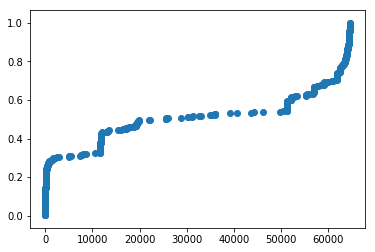

In [10]:
nans = [item[1] for item in nan_counts]

import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x, y = ecdf(nans)

plt.scatter(x,y)
plt.show()

In [7]:
df.groupby(['CC16_312_1']).count()

,Unnamed: 0,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
CC16_312_1,,,,,,,,,,,,,,,,,,,,,
No,11798,11798,11798,11397,11653,11798,11798,11798,11798,11798,...,3074,5485,820,2402,11798,11798,11383,11383,10820,10820
Yes,1471,1471,1471,1361,1443,1471,1471,1471,1471,1471,...,249,440,67,189,1471,1471,1359,1359,1344,1344


In [111]:
#find the guy from New Hampshire

df[(df['birthyr1'] == 1990) & (df['inputstate'] == 'Indiana') 
   & (df['CC16_410a'].str.contains("Trump")) & (df['CC16_334a'] == 'Support') & (df['ideo5'] == 'Liberal')
  & (df['CC16_351K'] == 'For')]

,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,cdid113,...,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname,birthyr1
53803,304287721,3.281297,8.748644,5.506889,1.740127,4.972837,Yes,47006,Indiana,6,...,polling,NaN,NaN,40:39.9,04:58.2,06:28.1,11:38.6,515.0,CINCINNATI,1990


In [16]:
df.groupby(['tookpost']).count()

,Unnamed: 0,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,lookupzip,inputstate,cdid113,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
tookpost,,,,,,,,,,,,,,,,,,,,,
No,11701,11701,11701,43,4280,11701,11701,11701,11701,11701,...,1040,1786,204,576,11701,11701,0,0,10827,10827
Yes,52899,52899,52899,52899,52868,52899,52899,52899,52899,52899,...,10843,19195,2499,7742,52899,52899,52899,52899,48706,48706


52899 took the post survey

In [30]:
df.groupby(['pew_bornagain']).count()

,index,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
pew_bornagain,,,,,,,,,,,,,,,,,,,,,
No,46371,46371,46371,38468,41364,46371,46371,46371,46371,46371,...,8400,15213,1897,6120,46371,46371,38434,38434,41983,41983
Yes,18186,18186,18186,14445,15749,18186,18186,18186,18186,18186,...,3479,5760,804,2191,18186,18186,14436,14436,17509,17509


In [4]:
df.groupby(['sexuality']).count()

,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,cdid113,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
sexuality,,,,,,,,,,,,,,,,,,,,,
Bisexual,1853,1853,1610,1853,1853,1853,1853,1853,1853,1853,...,329,587,74,212,1853,1853,1608,1608,1687,1687
Gay man,1638,1638,1494,1638,1638,1638,1638,1638,1638,1638,...,372,760,116,321,1638,1638,1493,1493,1506,1506
Heterosexual / straight,50942,50942,47608,50942,50942,50942,50942,50942,50942,50942,...,10148,17861,2288,7161,50942,50942,47571,47571,46945,46945
Lesbian / gay woman,688,688,639,688,688,688,688,688,688,688,...,146,247,30,94,688,688,637,637,625,625
Other,558,558,486,558,558,558,558,558,558,558,...,102,183,23,74,558,558,485,485,517,517
Prefer not to say,1208,1208,1074,1208,1208,1208,1208,1208,1208,1208,...,196,332,57,140,1208,1208,1074,1074,1105,1105


In [5]:
df.groupby(['investor']).count()

,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,cdid113,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
investor,,,,,,,,,,,,,,,,,,,,,
No,32481,32481,29688,32206,32481,32481,32481,32481,32481,32481,...,5584,9813,1205,3750,32481,32481,29673,29673,30046,30046
Yes,24195,24195,23133,24110,24195,24195,24195,24195,24195,24195,...,5663,10096,1372,4233,24195,24195,23107,23107,22135,22135


In [6]:
df.groupby(['trans']).count()

,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,cdid113,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
trans,,,,,,,,,,,,,,,,,,,,,
No,54497,54497,51356,54458,54497,54497,54497,54497,54497,54497,...,11034,19521,2530,7831,54497,54497,51319,51319,50158,50158
Prefer not to say,742,742,649,742,742,742,742,742,742,742,...,76,142,22,62,742,742,649,649,684,684
Yes,1041,1041,869,1039,1041,1041,1041,1041,1041,1041,...,99,174,17,63,1041,1041,869,869,978,978


In [7]:
df.groupby(['industryclass']).count()

,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,cdid113,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
industryclass,,,,,,,,,,,,,,,,,,,,,
Education Services,5325,5325,4676,4914,5325,5325,5325,5325,5325,5325,...,1238,2159,279,818,5325,5325,4668,4668,4877,4877
Health Care and Social Assistance,5530,5530,4674,4969,5530,5530,5530,5530,5530,5530,...,1031,1815,226,694,5530,5530,4667,4667,5083,5083
Administrative and Support,3425,3425,2986,3134,3425,3425,3425,3425,3425,3425,...,718,1226,178,504,3425,3425,2983,2983,3176,3176
Agriculture,572,572,418,483,572,572,572,572,572,572,...,74,149,25,87,572,572,418,418,545,545
"Arts, Entertainment, and Recreation",1644,1644,1308,1442,1644,1644,1644,1644,1644,1644,...,284,578,65,198,1644,1644,1307,1307,1509,1509
Construction,2410,2410,1721,1919,2410,2410,2410,2410,2410,2410,...,343,602,81,245,2410,2410,1719,1719,2237,2237
Finance and Insurance,2774,2774,2332,2478,2774,2774,2774,2774,2774,2774,...,538,978,146,397,2774,2774,2331,2331,2493,2493
Fishing and Hunting,108,108,62,78,108,108,108,108,108,108,...,9,16,3,9,108,108,62,62,104,104
Forestry,118,118,86,97,118,118,118,118,118,118,...,7,16,6,15,118,118,86,86,108,108


In [20]:
vars_df = pd.read_csv('variable_list.csv', encoding = 'latin1')
variables = vars_df.loc[vars_df['Include'] == 'yes']['Name'].tolist()

In [21]:
print(variables)

['tookpost', 'inputstate', 'birthyr', 'gender', 'educ', 'race', 'CC16_331_1', 'CC16_331_2', 'CC16_331_3', 'CC16_331_7', 'CC16_351K', 'faminc', 'CC16_334a', 'CC16_334d', 'CC16_334c', 'CC16_333d', 'CC16_333b', 'CC16_333a', 'CC16_332a', 'CC16_332d', 'CC16_332e', 'CC16_333c', 'ownhome', 'CC16_332c', 'CC16_332f', 'CC16_351I', 'CC16_332b', 'child18', 'CC16_351B', 'CC16_351E', 'union', 'CC16_327', 'immstat', 'CC16_351G', 'CC16_351F', 'CC16_330a', 'CC16_351H', 'CC16_330e', 'CC16_330b', 'unionhh', 'CC16_330d', 'CC16_335', 'CC16_364c', 'hispanic', 'sexuality', 'investor', 'trans', 'inputstate_post', 'votereg_post', 'CC16_414_1', 'CC16_414_2', 'CC16_414_3', 'CC16_414_4', 'CC16_414_5', 'CC16_414_6', 'CC16_417a_1', 'CC16_417a_2', 'CC16_417a_3', 'CC16_417a_4', 'CC16_417a_5', 'CC16_422d', 'CC16_422c', 'edloan', 'CC16_422f', 'CC16_422e', 'CC16_426_1', 'CC16_426_2', 'CC16_426_3', 'CC16_426_5', 'CC16_418a', 'CC16_426_4', 'CC16_401', 'CC16_326']


In [22]:
df1 = df[variables]

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64600 entries, 0 to 64599
Data columns (total 73 columns):
tookpost           64600 non-null object
inputstate         64600 non-null object
birthyr            64600 non-null int64
gender             64600 non-null object
educ               64600 non-null object
race               64600 non-null object
CC16_331_1         64600 non-null object
CC16_331_2         64600 non-null object
CC16_331_3         64600 non-null object
CC16_331_7         64600 non-null object
CC16_351K          64581 non-null object
faminc             64579 non-null object
CC16_334a          64568 non-null object
CC16_334d          64558 non-null object
CC16_334c          64549 non-null object
CC16_333d          64547 non-null object
CC16_333b          64544 non-null object
CC16_333a          64540 non-null object
CC16_332a          64538 non-null object
CC16_332d          64538 non-null object
CC16_332e          64538 non-null object
CC16_333c          64534 non-nu

In [28]:
post_df = df1[df1['tookpost'] == 'Yes']

post_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52899 entries, 0 to 64453
Data columns (total 73 columns):
tookpost           52899 non-null object
inputstate         52899 non-null object
birthyr            52899 non-null int64
gender             52899 non-null object
educ               52899 non-null object
race               52899 non-null object
CC16_331_1         52899 non-null object
CC16_331_2         52899 non-null object
CC16_331_3         52899 non-null object
CC16_331_7         52899 non-null object
CC16_351K          52883 non-null object
faminc             52887 non-null object
CC16_334a          52871 non-null object
CC16_334d          52860 non-null object
CC16_334c          52850 non-null object
CC16_333d          52855 non-null object
CC16_333b          52851 non-null object
CC16_333a          52847 non-null object
CC16_332a          52846 non-null object
CC16_332d          52851 non-null object
CC16_332e          52846 non-null object
CC16_333c          52844 non-nu

In [26]:
#cleaned_df = df1.dropna(axis = 0, how = 'any')
#cleaned_df.info()

#35315 left. probably many to exclude

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64600 entries, 0 to 64599
Data columns (total 73 columns):
tookpost           64600 non-null object
inputstate         64600 non-null object
birthyr            64600 non-null int64
gender             64600 non-null object
educ               64600 non-null object
race               64600 non-null object
CC16_331_1         64600 non-null object
CC16_331_2         64600 non-null object
CC16_331_3         64600 non-null object
CC16_331_7         64600 non-null object
CC16_351K          64581 non-null object
faminc             64579 non-null object
CC16_334a          64568 non-null object
CC16_334d          64558 non-null object
CC16_334c          64549 non-null object
CC16_333d          64547 non-null object
CC16_333b          64544 non-null object
CC16_333a          64540 non-null object
CC16_332a          64538 non-null object
CC16_332d          64538 non-null object
CC16_332e          64538 non-null object
CC16_333c          64534 non-nu

In [29]:
post_df.to_csv('cleaned.csv')